In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11147300269761363973
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5488024817815029941
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4951408640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12391553493343838615
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15740577331467474818
physical_device_desc: "device: XLA_GPU device"
]


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
import random
from sklearn import preprocessing
from math import sqrt
from numpy import mean
from numpy import std
from sklearn.metrics import make_scorer, accuracy_score, r2_score
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

train = pd.read_csv("dataset_1.csv")
train.head(10)

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,5.496528,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,6.768056,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,2.856944,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,3.534028,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
5,6.988889,0.0,5.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,1,0,0
6,2.686806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1,0,0,0,0,0,0,0,1,0
7,5.364583,0.0,4.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0,1,0,0,0,1,0,0,0,0
8,19.197917,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
9,3.565972,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


<AxesSubplot:xlabel='LOS'>

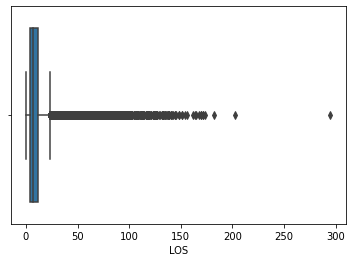

In [2]:
sns.boxplot(x=train['LOS'])

<AxesSubplot:xlabel='LOS'>

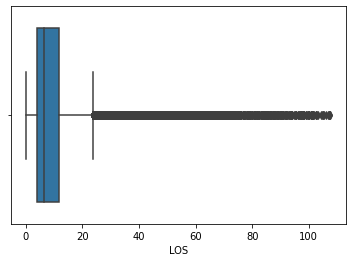

In [3]:
top = np.percentile(train.LOS,99.8)
train = train[ (train['LOS']<top) ]
sns.boxplot(x=train['LOS'])

<AxesSubplot:>

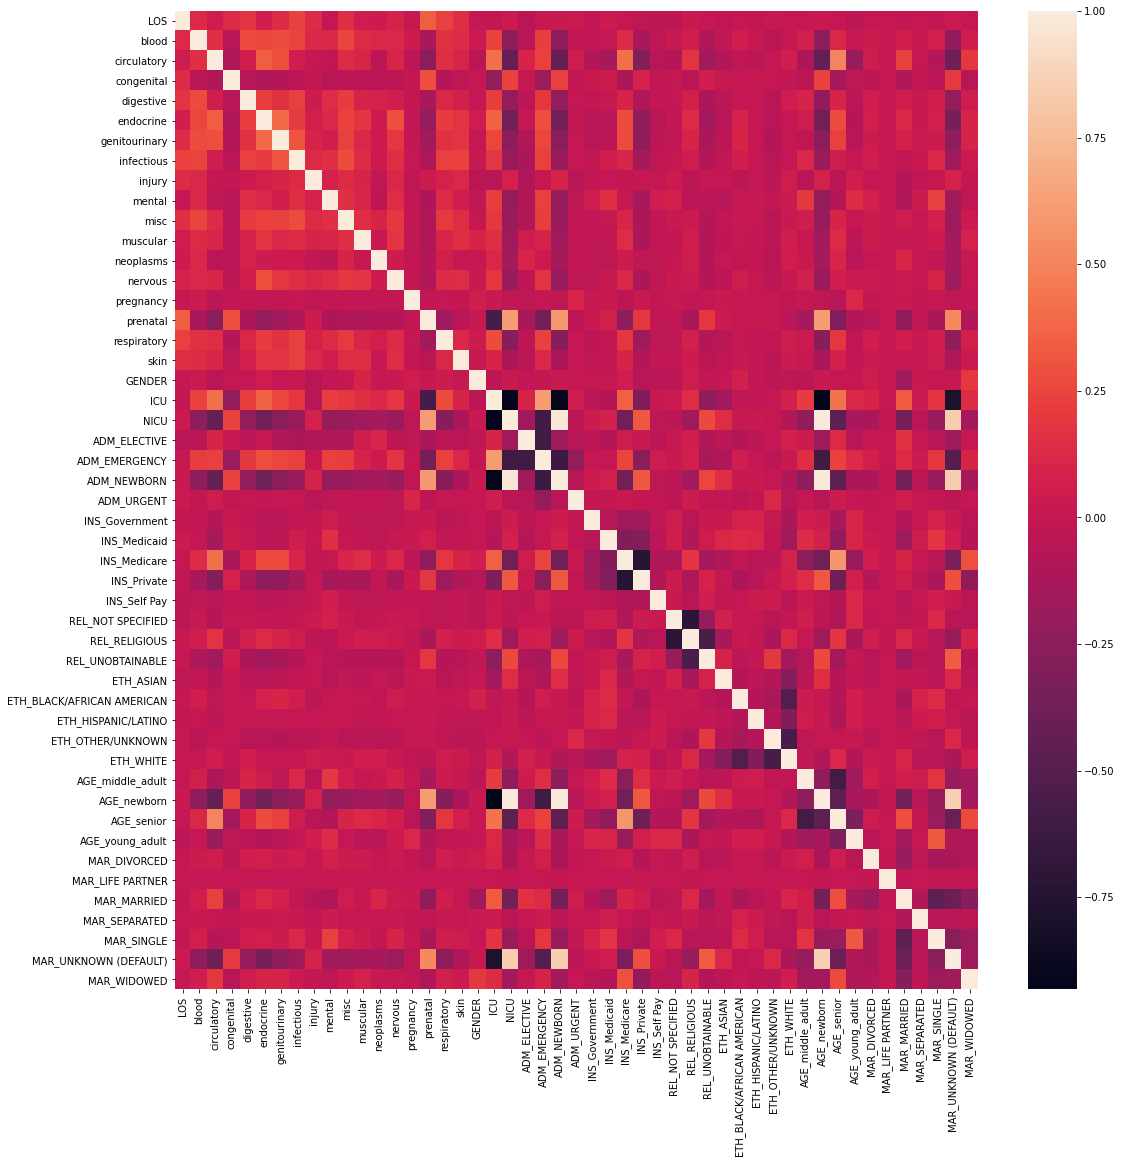

In [4]:
corr=train.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:>

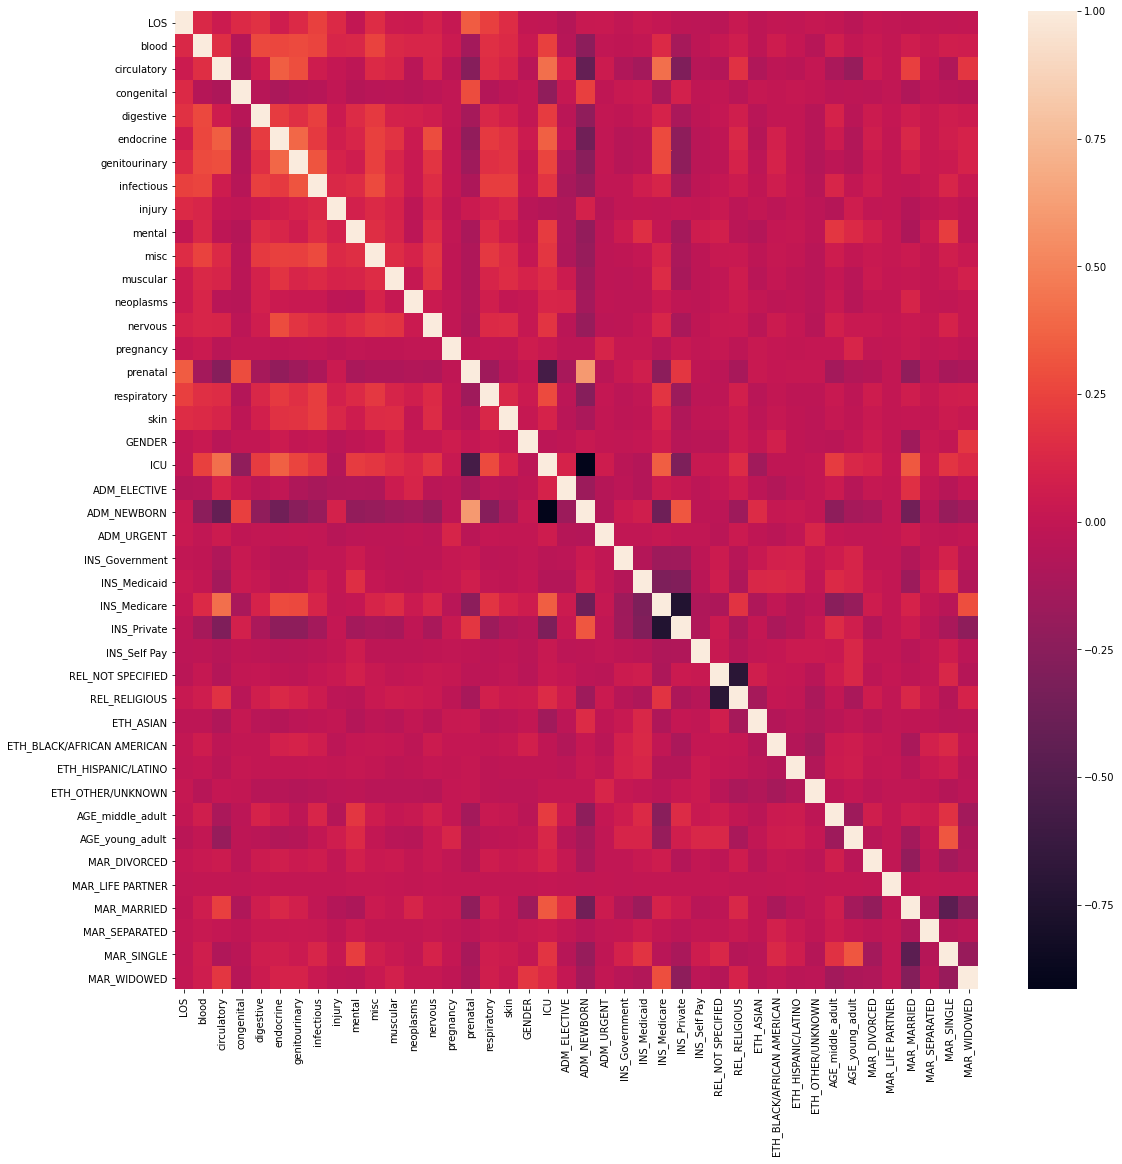

In [5]:
train2=train.drop(columns=['ADM_EMERGENCY'])
train2=train2.drop(columns=['MAR_UNKNOWN (DEFAULT)'])
train2=train2.drop(columns=['NICU'])
train2=train2.drop(columns=['AGE_newborn'])
train2=train2.drop(columns=['ETH_WHITE'])
train2=train2.drop(columns=['REL_UNOBTAINABLE'])
train2=train2.drop(columns=['AGE_senior'])

corr2=train2.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns)

In [6]:
train2.LOS.describe()

count    50934.000000
mean         9.982970
std         11.156500
min          0.014583
25%          3.852083
50%          6.557639
75%         11.769444
max        107.604861
Name: LOS, dtype: float64

In [7]:
train2.nunique()

LOS                           23917
blood                             7
circulatory                      17
congenital                       10
digestive                        12
endocrine                        12
genitourinary                     8
infectious                        8
injury                           23
mental                           12
misc                              9
muscular                          8
neoplasms                        11
nervous                           9
pregnancy                        14
prenatal                         17
respiratory                      10
skin                              9
GENDER                            2
ICU                               2
ADM_ELECTIVE                      2
ADM_NEWBORN                       2
ADM_URGENT                        2
INS_Government                    2
INS_Medicaid                      2
INS_Medicare                      2
INS_Private                       2
INS_Self Pay                

In [8]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50934 entries, 0 to 51036
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LOS                         50934 non-null  float64
 1   blood                       50934 non-null  float64
 2   circulatory                 50934 non-null  float64
 3   congenital                  50934 non-null  float64
 4   digestive                   50934 non-null  float64
 5   endocrine                   50934 non-null  float64
 6   genitourinary               50934 non-null  float64
 7   infectious                  50934 non-null  float64
 8   injury                      50934 non-null  float64
 9   mental                      50934 non-null  float64
 10  misc                        50934 non-null  float64
 11  muscular                    50934 non-null  float64
 12  neoplasms                   50934 non-null  float64
 13  nervous                     509

In [ ]:
%matplotlib inline
sns.boxplot(x=train2['LOS'], y=train2["MAR_WIDOWED"], data = train)
plt.show()

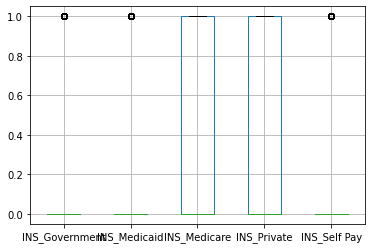

In [61]:
insurance = train2[['INS_Government', 'INS_Medicaid','INS_Medicare', 'INS_Private','INS_Self Pay']].copy()
boxplot = insurance.boxplot()

In [9]:
Y = train2['LOS'].values
X = train2.drop(columns=['LOS'])
print("Total Dataset Shape - ", X.shape)
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Train Set shape - ", X_train.shape)
print("Test Set shape - ", X_test.shape)

Total Dataset Shape -  (50934, 41)
Train Set shape -  (40747, 41)
Test Set shape -  (10187, 41)


In [ ]:
from sklearn.linear_model import LinearRegression
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print("Cross-Validatoin Performance - ")
print('Avergae MSE: (%.3f), Std: (%.3f)' % (-1*mean(scores), std(scores)))
print(-1*scores)
model.fit(X_train, y_train)
pred=model.predict(X_test);
mse = mean_squared_error(y_test, pred)
r2s = r2_score(y_test, pred)
print("Performance on test set - ")
print("MSE: %f" % (mse))
print("R2: %f" % (r2s))

Cross-Validatoin Performance - 
Avergae MSE: (84.827), Std: (4.581)
[86.33833066 83.0994207  82.0277603  79.63299763 80.64801847 84.77253291
 95.9750763  86.52937859 81.08468335 88.1628727 ]
Performance on test set - 
MSE: 80.736870
R2: 0.320258


In [ ]:
from sklearn.linear_model import Lasso

m3 = Lasso()
params = {'alpha': [0.4, 0.6, 0.8, 1] }
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m3, param_grid=params, scoring=scorer, cv=5)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'alpha': 1}

In [ ]:
from sklearn.linear_model import Lasso
cv3 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model3 = Lasso(alpha=1)
# evaluate model
scores3 = cross_val_score(model3, X_train, y_train, scoring='neg_mean_squared_error', cv=cv3, n_jobs=-1)

# report performance
print("Cross-Validatoin Performance - ")
print('Avergae MSE: (%.3f), Std: (%.3f)' % (-1*mean(scores3), std(scores3)))
print(-1*scores3)
model3.fit(X_train, y_train)
pred3=model3.predict(X_test);
mse3 = mean_squared_error(y_test, pred3)
r2s3 = r2_score(y_test, pred3)
print("Performance on test set - ")
print("MSE: %f" % (mse3))
print("R2: %f" % (r2s3))

Cross-Validatoin Performance - 
Avergae MSE: (93.221), Std: (5.059)
[ 96.31551509  90.76589628  89.75318692  85.97663016  88.95836889
  93.56606187 104.53428747  95.62223045  89.91683688  96.80410916]
Performance on test set - 
MSE: 88.584775
R2: 0.254184


In [ ]:
from sklearn.linear_model import Ridge
m4 = Ridge()
params = {'alpha': [0.2, 0.4, 0.6, 0.8, 1] }
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m4, param_grid=params, scoring=scorer, cv=10)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'alpha': 0.2}

In [ ]:
from sklearn.linear_model import Ridge
cv4 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model4 = Ridge(alpha=0.2)
# evaluate model
scores4 = cross_val_score(model4, X_train, y_train, scoring='neg_mean_squared_error', cv=cv4, n_jobs=-1)
# report performance
print("Cross-Validatoin Performance - ")
print('Avergae MSE: (%.3f), Std: (%.3f)' % (-1*mean(scores4), std(scores4)))
print(-1*scores4)
model4.fit(X_train, y_train)
pred4=model4.predict(X_test);
mse4 = mean_squared_error(y_test, pred4)
r2s4 = r2_score(y_test, pred4)
print("Performance on test set - ")
print("MSE: %f" % (mse4))
print("R2: %f" % (r2s4))

Cross-Validatoin Performance - 
Avergae MSE: (84.824), Std: (4.572)
[86.31885392 83.10569241 82.02911999 79.63449897 80.65964831 84.78107202
 95.95983317 86.54533858 81.08924216 88.11261049]
Performance on test set - 
MSE: 80.737011
R2: 0.320256


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
m5 = KNeighborsRegressor(n_jobs=-1)
params = {'n_neighbors': [5,7,11,15], 'p':[1,2], 'leaf_size':[5,15,25,30,45]}
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m5, param_grid=params, scoring=scorer, cv=10)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'leaf_size': 5, 'n_neighbors': 5, 'p': 1}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
cv5 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model5 = KNeighborsRegressor(leaf_size= 5, n_neighbors= 5, p= 1,n_jobs=-1)
# evaluate model
scores5 = cross_val_score(model5, X_train, y_train, scoring='neg_mean_squared_error', cv=cv5, n_jobs=-1)
# report performance
print("Cross-Validatoin Performance - ")
print('Avergae MSE: (%.3f), Std: (%.3f)' % (-1*mean(scores5), std(scores5)))
print(-1*scores5)
model5.fit(X_train, y_train)
pred5=model5.predict(X_test);
mse5 = mean_squared_error(y_test, pred5)
r2s5 = r2_score(y_test, pred5)
print("Performance on test set - ")
print("MSE: %f" % (mse5))
print("R2: %f" % (r2s5))

Cross-Validatoin Performance - 
Avergae MSE: (92.833), Std: (5.254)
[ 97.98944568  85.88757291  90.75227029  87.39146019  87.26811143
  96.86356607 103.47298733  93.38492904  90.8542695   94.46642408]
Performance on test set - 
MSE: 87.193987
R2: 0.265894


In [ ]:
from sklearn.tree import DecisionTreeRegressor
m6 = DecisionTreeRegressor()
params = {'max_depth': [6,8,10], 'min_samples_leaf':[1,5,10,20,50]}
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m6, param_grid=params, scoring=scorer, cv=10)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'max_depth': 10, 'min_samples_leaf': 1}

Cross-Validatoin Performance - 
Avergae MSE: (91.999), Std: (6.164)
[ 90.48306121  93.41849389  92.20483166  87.8251745   82.63292982
  95.85661098 104.0074765   92.58386111  83.19337222  97.7869355 ]
Performance on test set - 
MSE: 89.917556
R2: 0.242963
Feature: 0, Score: 1.05821
Feature: 1, Score: 2.12466
Feature: 2, Score: 2.54113
Feature: 3, Score: 4.93412
Feature: 4, Score: 1.69923
Feature: 5, Score: 1.35562
Feature: 6, Score: 10.01574
Feature: 7, Score: 4.92731
Feature: 8, Score: 0.38469
Feature: 9, Score: 1.06599
Feature: 10, Score: 0.30698
Feature: 11, Score: 0.22299
Feature: 12, Score: 4.14689
Feature: 13, Score: 0.26806
Feature: 14, Score: 39.64874
Feature: 15, Score: 14.08137
Feature: 16, Score: 1.80550
Feature: 17, Score: 0.50484
Feature: 18, Score: 1.79504
Feature: 19, Score: 0.41235
Feature: 20, Score: 0.23362
Feature: 21, Score: 0.58771
Feature: 22, Score: 0.61800
Feature: 23, Score: 1.02286
Feature: 24, Score: 0.50393
Feature: 25, Score: 0.39682
Feature: 26, Score: 0.1

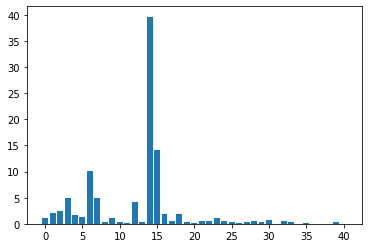

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model6 = DecisionTreeRegressor(random_state=0,max_depth = 10, min_samples_leaf = 1)
cv6 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores6 = cross_val_score(model6, X_train, y_train, scoring='neg_mean_squared_error', cv=cv6, n_jobs=-1)
# report performance
print("Cross-Validatoin Performance - ")
print('Avergae MSE: (%.3f), Std: (%.3f)' % (-1*mean(scores6), std(scores6)))
print(-1*scores6)
model6.fit(X_train, y_train)
pred6=model6.predict(X_test);
mse6 = mean_squared_error(y_test, pred6)
r2s6 = r2_score(y_test, pred6)
print("Performance on test set - ")
print("MSE: %f" % (mse6))
print("R2: %f" % (r2s6))

importance = model6.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,100*v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], 100*importance)
pyplot.show()

In [ ]:
import xgboost as xgb
m7 = xgb.XGBRegressor(random_state=0,n_jobs=-1,tree_method='gpu_hist', gpu_id=0)
params = {'max_depth': [10],'eta': [0.05, 0.1], 'lambda': [0.9, 1], 'alpha': [0.1,0.02] }
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m7, param_grid=params, scoring=scorer, cv=3)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'alpha': 0.1, 'eta': 0.1, 'lambda': 0.9, 'max_depth': 10}

Cross-Validatoin Performance - 
Avergae MSE: (79.479), Std: (3.695)
[81.70358165 76.9868551  76.95338325 77.2394411  73.94794335 81.61912017
 87.54907857 82.31552222 77.11287465 79.36293046]
Performance on test set - 
MSE: 75.192617
R2: 0.366936
Feature: 0, Score: 0.81668
Feature: 1, Score: 1.15894
Feature: 2, Score: 1.70275
Feature: 3, Score: 2.36661
Feature: 4, Score: 1.26883
Feature: 5, Score: 1.70581
Feature: 6, Score: 5.81084
Feature: 7, Score: 1.70025
Feature: 8, Score: 1.48837
Feature: 9, Score: 1.56087
Feature: 10, Score: 1.24983
Feature: 11, Score: 1.41310
Feature: 12, Score: 2.88386
Feature: 13, Score: 1.96789
Feature: 14, Score: 21.08546
Feature: 15, Score: 7.59244
Feature: 16, Score: 2.18529
Feature: 17, Score: 1.20737
Feature: 18, Score: 9.76720
Feature: 19, Score: 1.72089
Feature: 20, Score: 1.66319
Feature: 21, Score: 2.45261
Feature: 22, Score: 1.39115
Feature: 23, Score: 1.64359
Feature: 24, Score: 2.01622
Feature: 25, Score: 1.48821
Feature: 26, Score: 1.79723
Feature

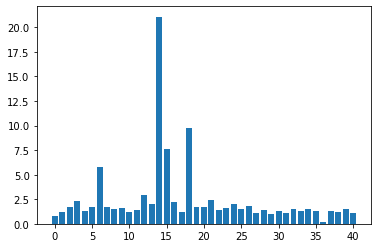

In [ ]:
model7 = xgb.XGBRegressor(random_state=0,n_jobs=-1,tree_method='gpu_hist', gpu_id=0, alpha= 0.1, eta= 0.1, max_depth= 10)
cv7 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores7 = cross_val_score(model7, X_train, y_train, scoring='neg_mean_squared_error', cv=cv7, n_jobs=-1)
# report performance
print("Cross-Validatoin Performance - ")
print('Avergae MSE: (%.3f), Std: (%.3f)' % (-1*mean(scores7), std(scores7)))
print(-1*scores7)
model7.fit(X_train, y_train)
pred7=model7.predict(X_test);
mse7 = mean_squared_error(y_test, pred7)
r2s7 = r2_score(y_test, pred7)
print("Performance on test set - ")
print("MSE: %f" % (mse7))
print("R2: %f" % (r2s7))

importance = model7.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,100*v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], 100*importance)
pyplot.show()

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=6  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.281-b09, mixed mode)
  Starting server from C:\Users\tsans\anaconda3\envs\py363\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\tsans\AppData\Local\Temp\tmpfx7pc6yc
  JVM stdout: C:\Users\tsans\AppData\Local\Temp\tmpfx7pc6yc\h2o_tsans_started_from_python.out
  JVM stderr: C:\Users\tsans\AppData\Local\Temp\tmpfx7pc6yc\h2o_tsans_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_tsans_pmmkjr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.333 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
train_h2o=pd.DataFrame(data=X_train)
train_h2o['LOS']=y_train
#X_train, X_test, y_train, y_test
h20_train=h2o.H2OFrame(train_h2o)
x1 = h20_train.columns
y1 = "LOS"
x1.remove(y1)
X_test_test= h2o.H2OFrame(X_test)
print('done')


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
done


In [ ]:
aml = H2OAutoML(max_models=12, seed=1)
aml.train(x=x1, y=y1, training_frame=h20_train)

AutoML progress: |
23:09:17.38: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210418_230917,75.2613,8.67533,75.2613,5.24994,0.627581
StackedEnsemble_BestOfFamily_AutoML_20210418_230917,75.48,8.68792,75.48,5.27148,0.630082
GBM_grid__1_AutoML_20210418_230917_model_2,76.6106,8.75275,76.6106,5.33735,0.638462
GBM_2_AutoML_20210418_230917,76.7525,8.76085,76.7525,5.30019,0.6335
GBM_grid__1_AutoML_20210418_230917_model_1,76.8502,8.76642,76.8502,5.32097,0.636582
GBM_5_AutoML_20210418_230917,77.0031,8.77514,77.0031,5.30865,0.63133
GBM_3_AutoML_20210418_230917,77.021,8.77616,77.021,5.30282,0.633636
GBM_1_AutoML_20210418_230917,77.0817,8.77962,77.0817,5.30904,0.634251
GBM_4_AutoML_20210418_230917,77.8031,8.82061,77.8031,5.31995,0.632142
DRF_1_AutoML_20210418_230917,80.2448,8.95795,80.2448,5.41877,0.640239


In [ ]:
predleader = aml.leader.predict(X_test_test)
pred = aml.predict(X_test_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [ ]:
dfpred = h2o.as_list(predleader)
mse8 = mean_squared_error(y_test, dfpred)
r2s8 = r2_score(y_test, dfpred)

In [ ]:
print("Performance on test set - ")
print("MSE: %f" % (mse8))
print("R2: %f" % (r2s8))

Performance on test set - 
MSE: 71.344349
R2: 0.399335


In [ ]:
h2o.shutdown()

C:\Users\tsans\anaconda3\envs\py363\lib\site-packages\ipykernel_launcher.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_ab6d closed.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from scipy.stats import zscore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

In [ ]:
Y = train2['LOS'].values
X = train2.drop(columns=['LOS'])
print("Total Dataset Shape - ", X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Train Set shape - ", X_train.shape)
print("Test Set shape - ", X_test.shape)

Total Dataset Shape -  (50934, 41)
Train Set shape -  (40747, 41)
Test Set shape -  (10187, 41)


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dense(1024, activation='relu'))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) # Output
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='mean_squared_error')
estp = EarlyStopping(monitor='val_loss', min_delta=0,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model.fit(X_train,y_train,validation_split=0.15,shuffle='True',verbose=2,epochs=200, callbacks=[estp])

Epoch 1/200
1083/1083 - 1s - loss: 87.1414 - val_loss: 79.2750
Epoch 2/200
1083/1083 - 1s - loss: 82.0754 - val_loss: 77.0274
Epoch 3/200
1083/1083 - 1s - loss: 79.9320 - val_loss: 80.7134
Epoch 4/200
1083/1083 - 1s - loss: 79.0281 - val_loss: 76.1055
Epoch 5/200
1083/1083 - 1s - loss: 78.2042 - val_loss: 80.1708
Epoch 6/200
1083/1083 - 1s - loss: 77.2554 - val_loss: 75.1798
Epoch 7/200
1083/1083 - 1s - loss: 76.9352 - val_loss: 80.4115
Epoch 8/200
1083/1083 - 1s - loss: 75.7805 - val_loss: 76.3678
Epoch 9/200
1083/1083 - 1s - loss: 75.6310 - val_loss: 76.1200
Epoch 10/200
1083/1083 - 1s - loss: 74.4583 - val_loss: 76.9306
Epoch 11/200
Restoring model weights from the end of the best epoch.
1083/1083 - 1s - loss: 73.8212 - val_loss: 77.8696
Epoch 00011: early stopping


In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 64)                2688      
_________________________________________________________________
dense_89 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_90 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 65        
Total params: 68,865
Trainable params: 68,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred9 = model.predict(X_test)
mse9 = mean_squared_error(y_test, pred9)
r2s9 = r2_score(y_test, pred9)

In [ ]:
print("Performance on test set - ")
print("MSE: %f" % (mse9))
print("R2: %f" % (r2s9))

Performance on test set - 
MSE: 74.571474
R2: 0.372165


In [12]:
from sklearn.ensemble import RandomForestRegressor
m6 = RandomForestRegressor()
params = {'max_depth': [8,10], 'min_samples_leaf':[5,10,20], 'n_jobs':[-1] }
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m6, param_grid=params, scoring=scorer, cv=10)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'max_depth': 8, 'min_samples_leaf': 20, 'n_jobs': -1}

In [17]:
model9 = RandomForestRegressor(random_state=0,n_jobs=-1, max_depth= 8, min_samples_leaf= 20)
cv9 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores9 = cross_val_score(model9, X_train, y_train, scoring='neg_mean_squared_error', cv=cv9, n_jobs=-1)
# report performance
print("Cross-Validatoin Performance - ")
print('Avergae MSE: (%.3f), Std: (%.3f)' % (-1*mean(scores9), std(scores9)))
print(-1*scores9)
model9.fit(X_train, y_train)
pred9=model9.predict(X_test);
mse9 = mean_squared_error(y_test, pred9)
r2s9 = r2_score(y_test, pred9)
print("Performance on test set - ")
print("MSE: %f" % (mse9))
print("R2: %f" % (r2s9))

Cross-Validatoin Performance - 
Avergae MSE: (80.511), Std: (3.955)
[80.87619701 79.83891909 79.77666988 77.80566044 73.99302857 82.45182817
 89.44769776 82.15626557 76.49900623 82.26431406]
Performance on test set - 
MSE: 77.658753
R2: 0.346173
